In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from matplotlib import pyplot as plt


pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [78]:
cd /Users/pwalesdi/Desktop/GA/NBA_Player_Prediction/

/Users/pwalesdi/Desktop/GA/NBA_Player_Prediction


In [2]:
%store -r nba
%store -r improvement

In [3]:
# Creating DFs for second, third .... year players
second_year = nba.loc[(nba['SEASON'] ==  nba['DRAFT_YEAR+1'] + 1)]
third_year = nba.loc[(nba['SEASON'] ==  nba['DRAFT_YEAR+1'] + 2)]
fourth_year = nba.loc[(nba['SEASON'] ==  nba['DRAFT_YEAR+1'] + 3)]
fifth_year = nba.loc[(nba['SEASON'] ==  nba['DRAFT_YEAR+1'] + 4)]
sixth_year = nba.loc[(nba['SEASON'] ==  nba['DRAFT_YEAR+1'] + 5)]
seventh_year = nba.loc[(nba['SEASON'] ==  nba['DRAFT_YEAR+1'] + 6)]
eight_year = nba.loc[(nba['SEASON'] ==  nba['DRAFT_YEAR+1'] + 7)]
ninth_year = nba.loc[(nba['SEASON'] ==  nba['DRAFT_YEAR+1'] + 8)]
tenth_year = nba.loc[(nba['SEASON'] ==  nba['DRAFT_YEAR+1'] + 9)]
eleventh_year = nba.loc[(nba['SEASON'] ==  nba['DRAFT_YEAR+1'] + 10)]
twelth_year = nba.loc[(nba['SEASON'] ==  nba['DRAFT_YEAR+1'] + 11)]
thirteen_year = nba.loc[(nba['SEASON'] ==  nba['DRAFT_YEAR+1'] + 12)]

In [20]:
half_1 = nba.loc[nba['DRAFT_YEAR+1'] < 2013]
half_2 = nba.loc[nba['DRAFT_YEAR+1'] > 2012]

In [30]:
nba = nba.loc[nba["MP"] > 250]
half_1 = half_1.loc[half_1["MP"] > 250]
half_2 = half_2.loc[half_2["MP"] > 250]

In [111]:
bins = [0, 10, 20, 30, 40, 50, 60]
bins_2 = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
improvement['binned_picks'] = pd.cut(improvement['Pk'], bins)
improvement['binned_picks_2'] = pd.cut(improvement['Pk'], bins_2)

improvement.sort_values(by="Tm_x", ascending=True)

,Player_name,player_id,SEASON,Tm_x,DRAFT_YEAR+1,Draft_team,Pk,Pos,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,College,Yrs,PTS,TRB,AST,FG%,3P%,FT%,PPG,RPG,APG,draft_round,binned_picks,binned_picks_2
4781,Al Horford,horfoal01,2010,ATL,2008.0,ATL,3.0,C,23,81,2845,19.4,0.594,0.001,0.319,9.6,23.3,16.4,10.4,1.1,2.4,11.2,17.6,6.9,3.9,10.9,0.183,1.5,1.9,3.3,3.8,University of Florida,12.0,11092.0,6597.0,2548.0,0.525,0.368,0.754,14.1,8.4,3.2,1.0,"(0.0, 10.0]","(0.0, 5.0]"
4062,Jeff Teague,teaguje01,2012,ATL,2010.0,ATL,19.0,PG,23,66,2183,15.8,0.551,0.222,0.275,1.1,7.4,4.3,24.3,2.6,1.3,15.1,19.1,3.0,3.0,6.0,0.131,0.7,0.4,1.2,1.7,Wake Forest University,10.0,9049.0,1759.0,4145.0,0.445,0.356,0.842,12.7,2.5,5.8,1.0,"(10.0, 20.0]","(15.0, 20.0]"
2785,DeMarre Carroll,carrode01,2014,ATL,2010.0,MEM,27.0,SF,27,73,2341,13.9,0.575,0.417,0.220,5.3,14.5,10.0,8.9,2.3,0.7,10.1,15.2,3.2,2.6,5.8,0.119,1.0,1.1,2.1,2.4,University of Missouri,10.0,5063.0,2399.0,701.0,0.430,0.360,0.743,9.1,4.3,1.3,1.0,"(20.0, 30.0]","(25.0, 30.0]"
946,Kyrie Irving,irvinky01,2018,BOS,2012.0,CLE,1.0,PG,25,60,1931,25.0,0.610,0.374,0.240,1.9,10.8,6.4,30.7,1.7,0.7,10.4,31.0,6.3,2.7,8.9,0.222,6.9,-0.7,6.2,4.0,Duke University,8.0,11294.0,1852.0,2884.0,0.465,0.390,0.875,22.2,3.6,5.7,1.0,"(0.0, 10.0]","(0.0, 5.0]"
1671,Isaiah Thomas,thomais02,2017,BOS,2012.0,SAC,60.0,PG,27,76,2569,26.5,0.625,0.439,0.441,1.9,7.0,4.4,32.5,1.4,0.4,10.7,34.0,10.9,1.6,12.5,0.234,8.7,-3.3,5.4,4.8,University of Washington,8.0,9020.0,1220.0,2453.0,0.437,0.360,0.874,18.6,2.5,5.1,2.0,"(50.0, 60.0]","(55.0, 60.0]"
5478,Rajon Rondo,rondora01,2009,BOS,2007.0,PHO,21.0,PG,22,80,2642,18.8,0.543,0.063,0.353,4.8,13.9,9.6,39.7,3.0,0.3,19.2,19.2,4.8,5.1,9.9,0.179,2.0,2.5,4.5,4.3,University of Kentucky,13.0,8567.0,3989.0,6975.0,0.460,0.315,0.605,10.4,4.8,8.5,1.0,"(20.0, 30.0]","(20.0, 25.0]"
1342,Jae Crowder,crowdja01,2017,BOS,2013.0,CLE,34.0,SF,26,72,2335,14.9,0.613,0.547,0.301,2.3,17.3,9.9,10.1,1.6,0.8,8.9,17.0,4.1,2.5,6.7,0.137,1.4,0.2,1.6,2.1,Marquette University,7.0,5137.0,2121.0,770.0,0.423,0.339,0.778,9.5,3.9,1.4,2.0,"(30.0, 40.0]","(30.0, 35.0]"
1142,Terry Rozier,roziete01,2018,BOS,2016.0,BOS,16.0,PG,23,80,2068,15.1,0.520,0.503,0.186,3.4,16.3,9.9,17.5,1.9,0.8,8.5,20.4,2.2,3.4,5.6,0.130,0.8,1.0,1.8,2.0,University of Louisville,4.0,2090.0,973.0,631.0,0.380,0.354,0.777,7.7,3.6,2.3,1.0,"(10.0, 20.0]","(15.0, 20.0]"
573,D'Angelo Russell,russeda01,2019,BRK,2016.0,LAL,2.0,PG,22,81,2448,19.4,0.533,0.419,0.135,2.3,11.2,6.8,41.3,1.9,0.6,13.6,31.9,2.4,2.6,5.0,0.097,3.9,-0.5,3.4,3.3,Ohio State University,4.0,4493.0,999.0,1381.0,0.419,0.353,0.762,16.5,3.7,5.1,1.0,"(0.0, 10.0]","(0.0, 5.0]"
1883,Pau Gasol,gasolpa01,2016,CHI,NaN,NaN,NaN,C,35,72,2291,21.7,0.529,0.069,0.290,7.3,28.7,18.2,21.7,0.9,4.7,12.8,24.6,3.2,3.9,7.1,0.149,0.5,3.5,4.0,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


No handles with labels found to put in legend.


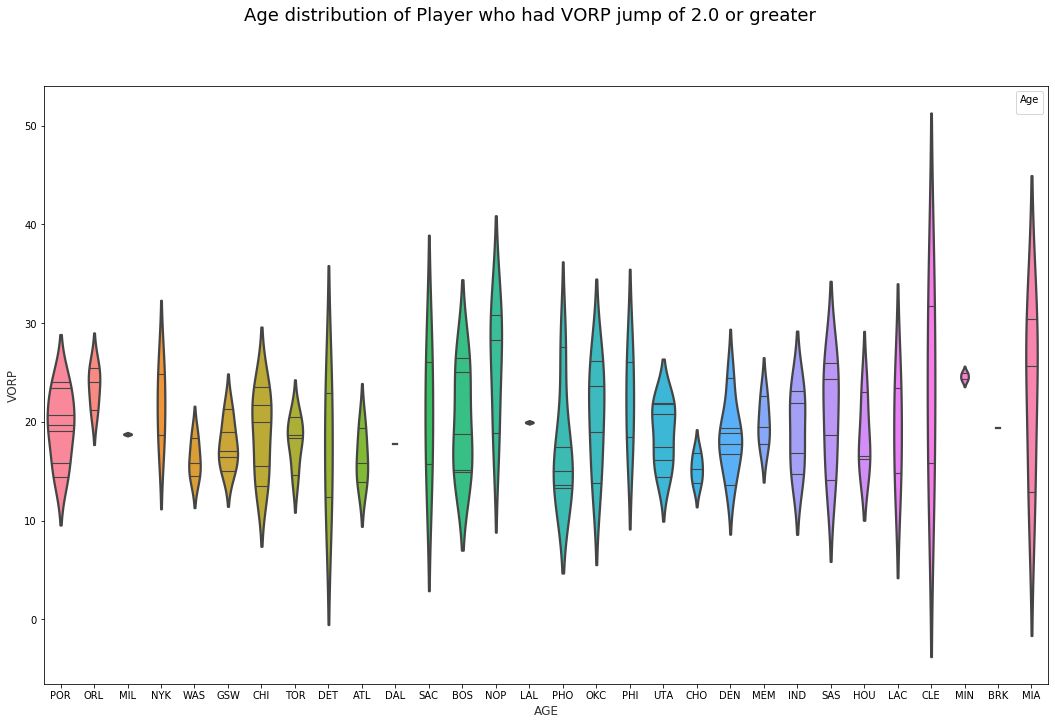

In [110]:
f, (ax) = plt.subplots(1, 1, figsize=(18, 11))
f.suptitle('Age distribution of Player who had VORP jump of 2.0 or greater', fontsize=18)

sns.violinplot(data=improvement,
               x="Tm_x", y="PER",
               ax=ax, split=True, scale="count", 
               inner="stick", linewidth=2.25, saturation=1)

ax.set_xlabel("AGE",size=12,alpha=0.8)
ax.set_ylabel("VORP",size=12,alpha=0.8)
ax.legend(title='Age')
# ax.set(xticklabels=[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]);
f.savefig("improvement_vorp_age.png")

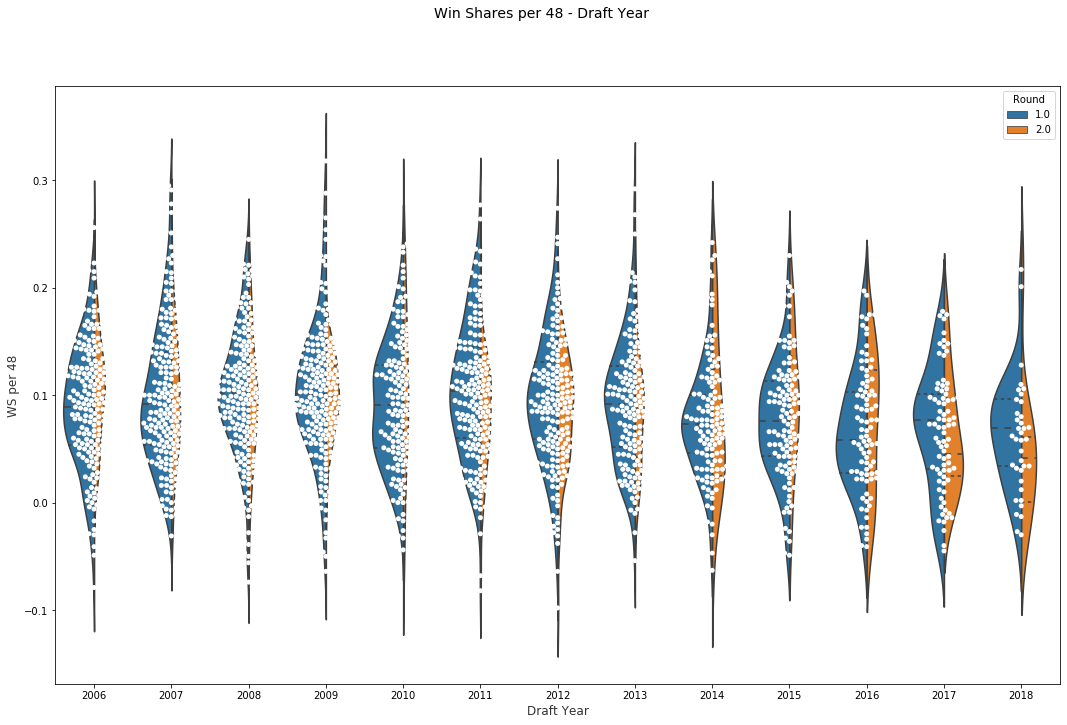

In [99]:
f, (ax) = plt.subplots(1, 1, figsize=(18, 11))
f.suptitle('Win Shares per 48 - Draft Year', fontsize=14)

ax = sns.violinplot(data=nba,
               x="DRAFT_YEAR+1", y="WS/48", hue='draft_round',
               ax=ax, split=True, scale="count", inner="quart")
ax = sns.swarmplot(x="DRAFT_YEAR+1", y="WS/48", data=nba,
                    color="white", edgecolor="gray")

ax.set_xlabel("Draft Year",size=12,alpha=0.8)
ax.set_ylabel("WS per 48",size=12,alpha=0.8)
ax.legend(title='Round')
ax.set(xticklabels=[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]);
f.savefig("ws_per48_dftYR_byRound.png")

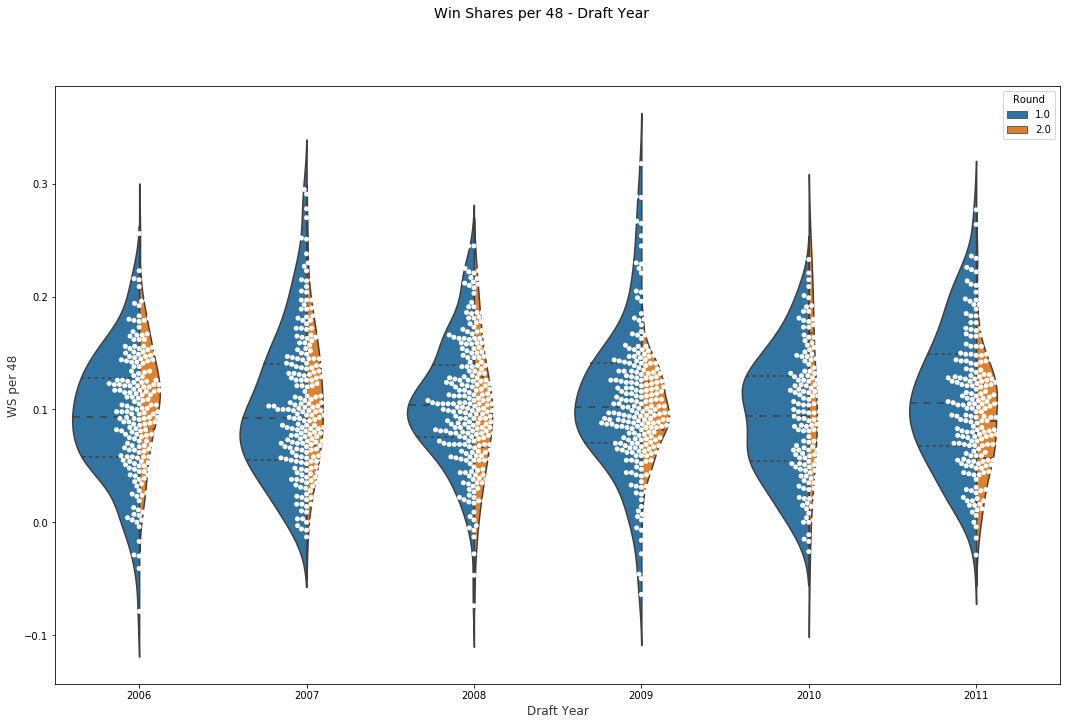

In [103]:
f, (ax) = plt.subplots(1, 1, figsize=(18, 11))
f.suptitle('Win Shares per 48 - Draft Year', fontsize=14)

ax = sns.violinplot(data=half_1,
               x="DRAFT_YEAR+1", y="WS/48", hue='draft_round',
               ax=ax, split=True, inner="quart", scale="count")
ax = sns.swarmplot(x="DRAFT_YEAR+1", y="WS/48", data=half_1,
                    color="white", edgecolor="gray")

ax.set_xlabel("Draft Year",size=12,alpha=0.8)
ax.set_ylabel("WS per 48",size=12,alpha=0.8)
ax.legend(title='Round')
ax.set(xticklabels=[2006, 2007, 2008, 2009, 2010, 2011]);
f.savefig("ws_per48_dftYR_byRound_1.png")

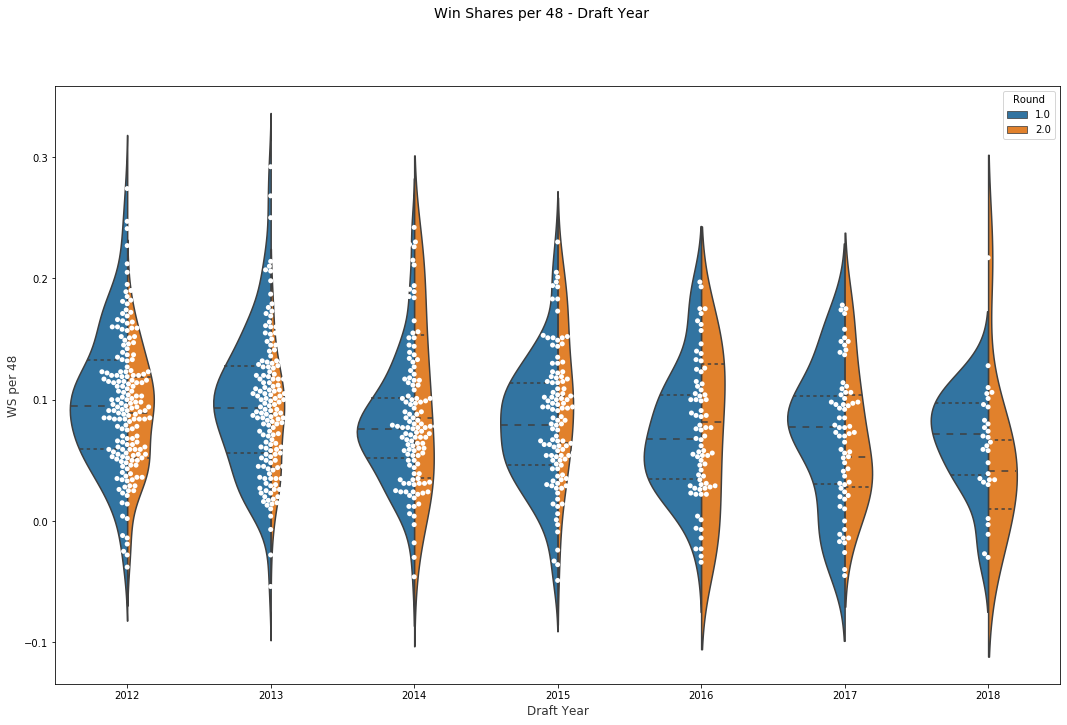

In [102]:
f, (ax) = plt.subplots(1, 1, figsize=(18, 11))
f.suptitle('Win Shares per 48 - Draft Year', fontsize=14)

ax = sns.violinplot(data=half_2,
               x="DRAFT_YEAR+1", y="WS/48", hue='draft_round',
               ax=ax, split=True, inner="quart", orient="v", scale="count")
ax = sns.swarmplot(x="DRAFT_YEAR+1", y="WS/48", data=half_2,
                    color="white", edgecolor="gray")


ax.set_xlabel("Draft Year",size=12,alpha=0.8)
ax.set_ylabel("WS per 48",size=12,alpha=0.8)
ax.legend(title='Round')
ax.set(xticklabels=[2012, 2013, 2014, 2015, 2016, 2017, 2018]);
f.savefig("ws_per48_dftYR_byRound_2.png")

In [8]:
nba.loc[nba['SEASON'] == 2019].groupby(['Tm_x', 'Player_name'])['PER', 'WS', 'VORP'].agg(sum)

PER    WS  VORP
Tm_x Player_name                               
ATL  Alex Len                  17.2   3.2   0.4
     Alex Poythress            12.2   0.5   0.0
     B.J. Johnson              14.0   0.1  -0.1
     Daniel Hamilton            7.1  -0.1  -0.2
     DeAndre' Bembry           10.8   0.9  -0.1
     Dewayne Dedmon            16.0   4.0   1.3
     Deyonta Davis             15.6   0.4   0.0
     Isaac Humphries            3.4  -0.1  -0.2
     Jaylen Adams               7.6   0.1  -0.3
     Jeremy Lin                15.9   1.9  -0.1
     John Collins              21.8   6.0   1.6
     Jordan Sibert             29.7   0.0   0.0
     Justin Anderson           11.2   0.4  -0.1
     Kent Bazemore             11.9   0.7  -0.1
     Kevin Huerter             10.1   1.5   0.1
     Miles Plumlee             18.9   0.5   0.1
     Omari Spellman            12.4   1.2   0.2
     Taurean Waller-Prince     11.9   1.5   0.0
     Trae Young                17.0   3.3   0.6
     Tyler Dorsey               7.8  -0.1  -0.3
     Tyler Zeller               1.5   0.0   0.0
     Vince Carter              11.8   1.9   0.1
BOS  Al Horford                20.2   7.5   3.4
     Aron Baynes               14.0   2.4   0.5
     Brad Wanamaker            14.3   1.0   0.0
     Daniel Theis              17.0   3.5   1.0
     Gordon Hayward            15.6   4.9   1.2
     Greg Monroe               60.2   0.1   0.1
     Guerschon Yabusele        12.4   0.5   0.0
     Jaylen Brown              13.5   3.0   0.0
     Jayson Tatum              15.1   5.0   0.8
     Kyrie Irving              24.3   9.1   4.7
     Marcus Morris             14.2   4.5   0.3
     Marcus Smart              13.1   5.3   2.1
     PJ Dozier                 16.0   0.1   0.0
     R.J. Hunter               21.5   0.1   0.0
     Robert Williams           18.8   1.2   0.5
     Semi Ojeleye               8.5   0.7  -0.3
     Terry Rozier              12.9   3.2   0.6
BRK  Alan Williams             32.9   0.2   0.1
     Allen Crabbe               7.7   0.8  -0.1
     Caris LeVert              14.9   1.7   0.5
     D'Angelo Russell          19.4   5.0   3.3
     DeMarre Carroll           12.1   3.1   0.1
     Džanan Musa                5.8  -0.1  -0.1
     Ed Davis                  17.3   5.7   0.9
     Jared Dudley               7.8   1.8   0.4
     Jarrett Allen             18.5   7.6   2.4
     Joe Harris                13.5   5.5   1.7
     Kenneth Faried            20.5   0.4   0.0
     Mitch Creek               21.5   0.2   0.0
     Rodions Kurucs            11.0   1.6  -0.1
     Rondae Hollis-Jefferson   12.5   1.2  -0.3
     Shabazz Napier            15.3   2.0   0.3
     Spencer Dinwiddie         16.3   4.8   0.8
     Tahjere McCall             9.6   0.0   0.0
     Theo Pinson                8.1   0.0  -0.1
     Treveon Graham             6.1   0.5  -0.2
CHI  Antonio Blakeney          10.6  -0.5  -1.3
     Bobby Portis              17.2   0.7  -0.1
     Brandon Sampson            8.5   0.0  -0.1
     Cameron Payne             10.3   0.2  -0.3
     Chandler Hutchison         8.8   0.6  -0.5
     Cristiano Felício         13.4   1.4  -0.3
     JaKarr Sampson            22.5   0.5   0.0
     Jabari Parker             14.6   0.5  -0.3
     Justin Holiday            11.0   1.3   0.9
     Kris Dunn                 12.4   0.6   0.1
     Lauri Markkanen           17.1   2.7   0.0
     Otto Porter               18.0   1.1   0.4
     Rawle Alkins               8.1  -0.1  -0.1
     Robin Lopez               15.9   2.7   0.4
     Ryan Arcidiacono          11.6   3.7   0.5
     Shaquille Harrison        12.4   1.4   0.2
     Timothé Luwawu-Cabarrot    9.0   0.3  -0.3
     Tyler Ulis                 0.0   0.0   0.0
     Walt Lemon                16.3   0.1   0.0
     Wayne Selden               8.1  -0.4  -0.8
     Wendell Carter            15.2   1.9   0.4
     Zach LaVine               18.7   2.8   1.1
CHO  Bismack Biyombo           14.4   2.0   0.2
     Cody Zeller               17.2   3.9   1.2


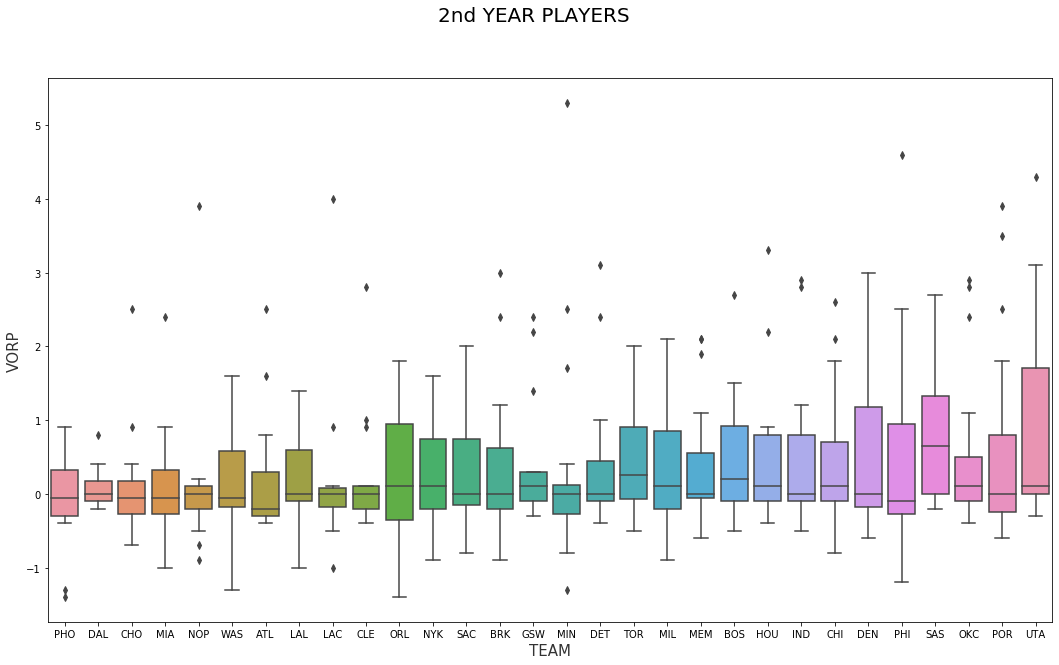

In [9]:
order = second_year.groupby('Tm_x')['VORP'].sum().sort_values(ascending=True)
f, (ax) = plt.subplots(1, 1, figsize=(18, 10))
f.suptitle('2nd YEAR PLAYERS', fontsize=20)

sns.boxplot(data=second_year,
               x="Tm_x", 
               y='VORP',   
               ax=ax,
               order=order.index)

ax.set_xlabel("TEAM",size=15,alpha=0.8)
ax.set_ylabel("VORP",size=15,alpha=0.8);
f.savefig("2nd_year_best.png")

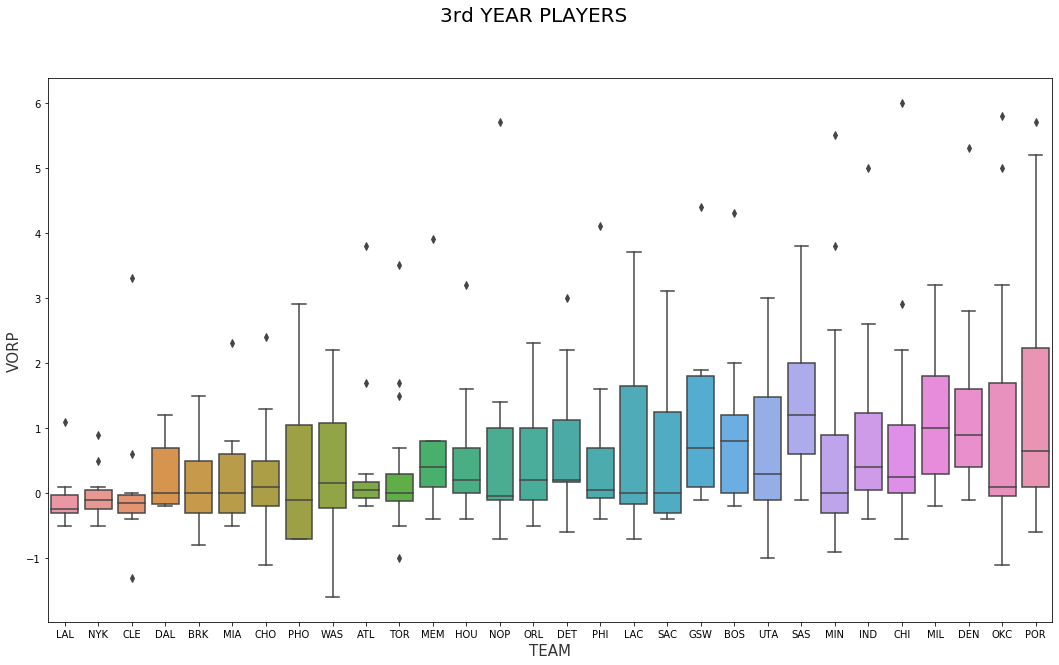

In [10]:
order = third_year.groupby('Tm_x')['VORP'].sum().sort_values(ascending=True)
f, (ax) = plt.subplots(1, 1, figsize=(18, 10))
f.suptitle('3rd YEAR PLAYERS', fontsize=20)

sns.boxplot(data=third_year,
               x="Tm_x", 
               y='VORP',   
               ax=ax,
               order=order.index)

ax.set_xlabel("TEAM",size=15,alpha=0.8)
ax.set_ylabel("VORP",size=15,alpha=0.8);
f.savefig("3rd_year_best.png")

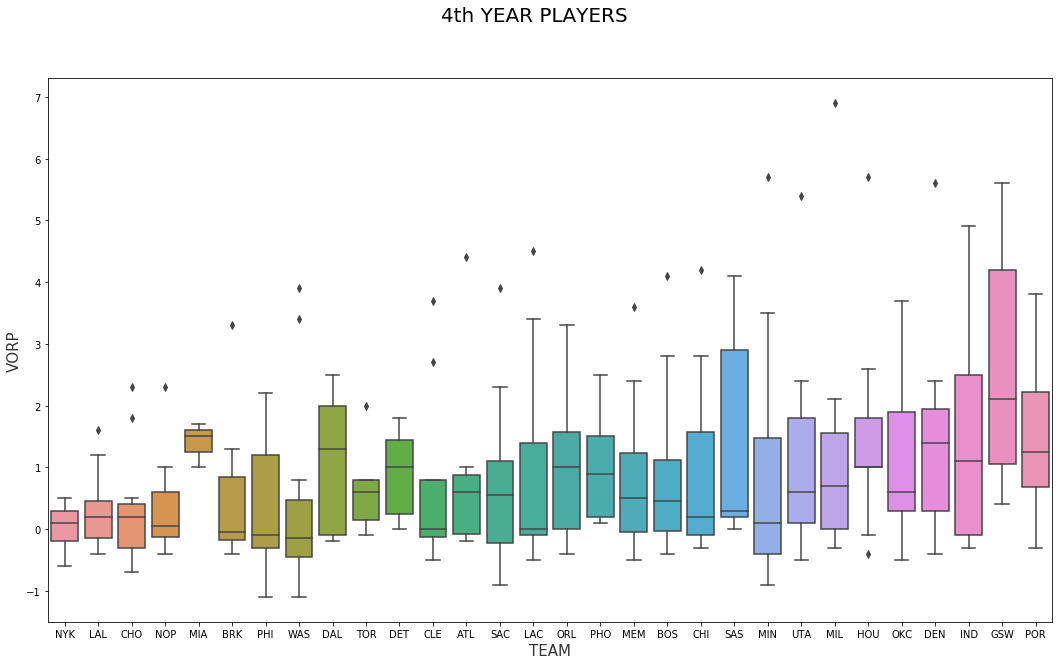

In [11]:
order = fourth_year.groupby('Tm_x')['VORP'].sum().sort_values(ascending=True)
f, (ax) = plt.subplots(1, 1, figsize=(18, 10))
f.suptitle('4th YEAR PLAYERS', fontsize=20)

sns.boxplot(data=fourth_year,
               x="Tm_x", 
               y='VORP',   
               ax=ax,
               order=order.index)

ax.set_xlabel("TEAM",size=15,alpha=0.8)
ax.set_ylabel("VORP",size=15,alpha=0.8);
f.savefig("4th_year_best.png")

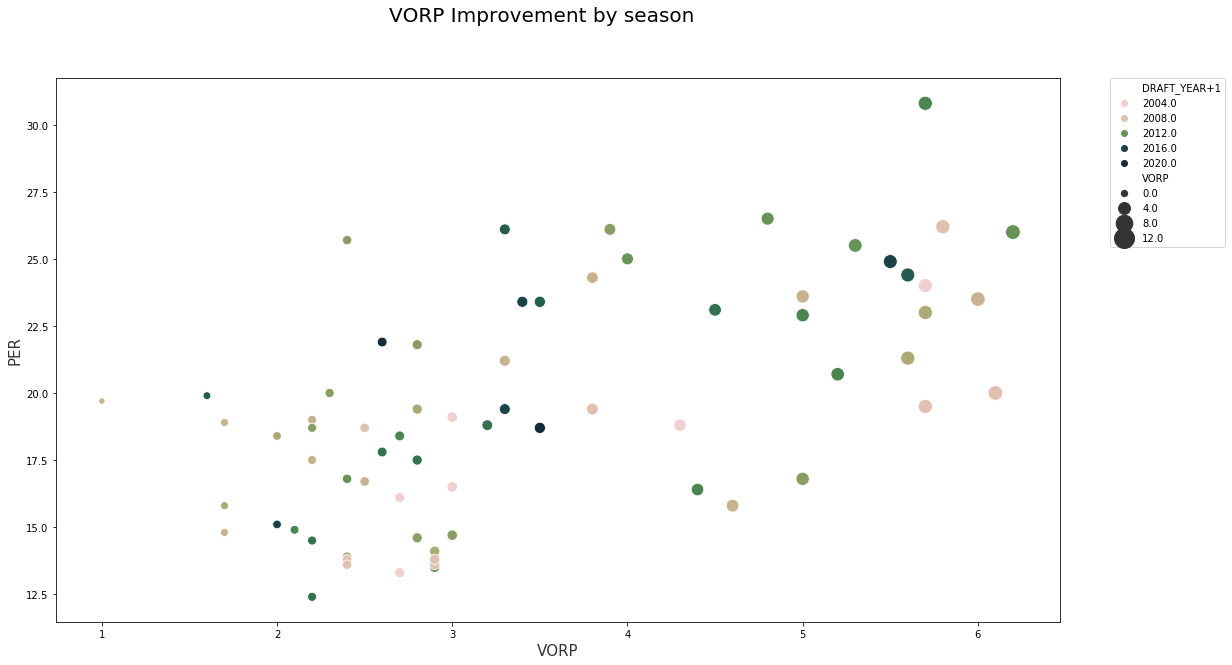

In [12]:
# order = second_year.groupby('Tm_x')['VORP'].sum().sort_values(ascending=True)
cmap = sns.cubehelix_palette(n_colors=2, rot=-.8, as_cmap=True)
f, (ax) = plt.subplots(1, 1, figsize=(18, 10))
f.suptitle('VORP Improvement by season', fontsize=20)

sns.scatterplot(data=improvement,
                x="VORP", 
                y='PER',   
                ax=ax,
                hue='DRAFT_YEAR+1',
                size="VORP", sizes=(40, 400), palette=cmap)

ax.set_xlabel("VORP",size=15,alpha=0.8)
ax.set_ylabel("PER",size=15,alpha=0.8);
f.savefig("VORP_improvement.png")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In [43]:
improvement.sort_values(by="Pk", ascending=True)

,Player_name,player_id,SEASON,Tm_x,DRAFT_YEAR+1,Draft_team,Pk,Pos,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,College,Yrs,PTS,TRB,AST,FG%,3P%,FT%,PPG,RPG,APG,draft_round
946,Kyrie Irving,irvinky01,2018,BOS,2012.0,CLE,1.0,PG,25,60,1931,25.0,0.610,0.374,0.240,1.9,10.8,6.4,30.7,1.7,0.7,10.4,31.0,6.3,2.7,8.9,0.222,6.9,-0.7,6.2,4.0,Duke University,8.0,11294.0,1852.0,2884.0,0.465,0.390,0.875,22.2,3.6,5.7,1.0
1190,Karl-Anthony Towns,townska01,2018,MIN,2016.0,MIN,1.0,C,22,82,2918,24.9,0.646,0.243,0.343,9.3,30.9,20.0,10.8,1.1,3.5,10.5,22.9,10.6,3.4,14.0,0.230,4.4,1.1,5.5,5.5,University of Kentucky,4.0,7187.0,3831.0,839.0,0.537,0.392,0.836,22.3,11.9,2.6,1.0
2326,Anthony Davis,davisan02,2015,NOP,2013.0,NOH,1.0,PF,21,68,2455,30.8,0.591,0.010,0.384,8.0,24.1,16.1,11.6,2.1,6.2,6.3,27.8,9.9,4.2,14.0,0.274,4.2,3.0,7.1,5.7,University of Kentucky,7.0,11059.0,4906.0,982.0,0.517,0.314,0.795,23.7,10.5,2.1,1.0
4486,Derrick Rose,rosede01,2011,CHI,2009.0,CHI,1.0,PG,22,81,3026,23.5,0.550,0.241,0.348,3.2,9.4,6.4,38.7,1.5,1.3,13.1,32.2,8.3,4.8,13.1,0.208,5.8,0.1,5.9,6.0,University of Memphis,10.0,10281.0,1910.0,3056.0,0.453,0.304,0.824,18.8,3.5,5.6,1.0
1089,Victor Oladipo,oladivi01,2018,IND,2014.0,ORL,2.0,SG,25,75,2552,23.1,0.577,0.323,0.274,2.1,15.1,8.6,21.2,3.5,2.0,12.7,30.1,4.3,4.0,8.2,0.155,3.6,1.3,4.9,4.5,Indiana University,6.0,7028.0,1859.0,1589.0,0.443,0.352,0.793,17.5,4.6,4.0,1.0
4707,Kevin Durant,duranke01,2010,OKC,2008.0,SEA,2.0,SF,21,82,3239,26.2,0.607,0.210,0.504,3.8,17.9,11.0,13.5,1.8,1.9,11.7,32.0,11.1,5.0,16.1,0.238,4.9,0.2,5.1,5.8,University of Texas at Austin,12.0,22940.0,5992.0,3486.0,0.493,0.381,0.883,27.0,7.1,4.1,1.0
573,D'Angelo Russell,russeda01,2019,BRK,2016.0,LAL,2.0,PG,22,81,2448,19.4,0.533,0.419,0.135,2.3,11.2,6.8,41.3,1.9,0.6,13.6,31.9,2.4,2.6,5.0,0.097,3.9,-0.5,3.4,3.3,Ohio State University,4.0,4493.0,999.0,1381.0,0.419,0.353,0.762,16.5,3.7,5.1,1.0
5033,LaMarcus Aldridge,aldrila01,2009,POR,2007.0,CHI,2.0,PF,23,81,3004,19.1,0.529,0.023,0.269,9.5,15.6,12.5,9.3,1.4,2.0,8.0,23.7,6.1,3.3,9.5,0.151,1.2,0.7,1.9,3.0,University of Texas at Austin,13.0,18598.0,7968.0,1856.0,0.491,0.283,0.810,19.6,8.4,2.0,1.0
2091,Otto Porter,porteot01,2016,WAS,2014.0,WAS,3.0,SF,22,75,2276,14.5,0.564,0.372,0.176,4.7,14.7,9.6,7.9,2.2,1.1,8.3,16.2,3.0,2.7,5.6,0.119,0.8,1.0,1.8,2.2,Georgetown University,6.0,4383.0,1989.0,593.0,0.483,0.405,0.793,11.0,5.0,1.5,1.0
4781,Al Horford,horfoal01,2010,ATL,2008.0,ATL,3.0,C,23,81,2845,19.4,0.594,0.001,0.319,9.6,23.3,16.4,10.4,1.1,2.4,11.2,17.6,6.9,3.9,10.9,0.183,1.5,1.9,3.3,3.8,University of Florida,12.0,11092.0,6597.0,2548.0,0.525,0.368,0.754,14.1,8.4,3.2,1.0
